In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# still under test.....


def plot_sim_data(
    molecule, 
    data, 
    start=None, 
    stop=None, 
    ZPE_label=True, 
    vref_data=None, 
    ylim=None,
    hydroxide_distance=None, 
    weights=None, 
    bins=50, 
    density=True, 
    kind="line"
):
    """
    Generalized plotting function for simulation data.

    Parameters:
        molecule (str): Name of the molecule (e.g., "H5O3").
        data (np.ndarray): Main data for plotting (e.g., vref or histogram data).
        start (int): Starting index for averaging ZPE.
        stop (int): Stopping index for averaging ZPE.
        ZPE_label (bool): Whether to include ZPE in the plot.
        vref_data (np.ndarray): vref array containing timestep and energy data.
        ylim (tuple): Y-axis limits for the plot.
        hydroxide_distance (np.ndarray): Distances for histogram plotting.
        weights (np.ndarray): Weights for normalizing histograms.
        bins (int): Number of bins for histograms.
        density (bool): Whether to normalize histograms.
        kind (str): Plot type ("line", "histogram", "kde").
    """
    sns.set_style("white")
    
    # Plotting vref or simulation data
    if kind == "line" and vref_data is not None:
        # Calculate ZPE if start and stop are specified
        if start is not None and stop is not None:
            ZPE = np.mean(vref_data[start:stop, 1])
        else:
            ZPE = None

        plt.plot(vref_data[:, 0], vref_data[:, 1], label=f"Vref for {molecule}")
        
        if ZPE_label and ZPE is not None:
            plt.hlines(y=ZPE, xmin=start, xmax=stop, color="tab:orange", label=f"ZPE: {ZPE:.2f}")

        plt.legend()
        plt.xlabel("Timestep (1 a.u.)")
        plt.ylabel("Eref (cm$^{-1}$)")
        if ylim:
            plt.ylim(ylim)
        plt.show()

    # Histogram plotting
    elif kind == "histogram" and hydroxide_distance is not None:
        exp_val = np.average(hydroxide_distance, weights=weights)
        
        plt.hist(hydroxide_distance, bins=bins, weights=weights, density=density, alpha=0.7, label="Histogram")
        plt.vlines(exp_val, 0, plt.gca().get_ylim()[1], color="magenta", label=f"Exp Val: {exp_val:.4f} $\AA$")
        
        plt.legend()
        plt.xlabel("Hydroxide Bond Length ($\AA$)")
        plt.ylabel("Probability Amplitude")
        plt.show()

    # KDE Plot
    elif kind == "kde" and hydroxide_distance is not None:
        sns.kdeplot(hydroxide_distance, weights=weights, label="KDE")
        exp_val = np.average(hydroxide_distance, weights=weights)
        plt.vlines(exp_val, 0, plt.gca().get_ylim()[1], color="magenta", label=f"Exp Val: {exp_val:.4f} $\AA$")
        
        plt.legend()
        plt.xlabel("Hydroxide Bond Length ($\AA$)")
        plt.ylabel("Probability Amplitude")
        plt.show()

    else:
        print("Invalid parameters. Please provide appropriate data and specify 'kind' (e.g., 'line', 'histogram', 'kde').")


In [19]:
import pyvibdmc as pv

path_to_data = 'D:/GitHub/pyvisdmc/data/h5o3_example_data/1.0w_50000_walkers_50000t_1dt' #path to the folder containing the simulation data

sim_data = pv.SimInfo(f'{path_to_data}/H5O3_0_sim_info.hdf5') #name of the simulation summary file

#ZPE = tutorial_sim.get_zpe(onwards=15000, ret_cm=True)

start = 10000 #where we want to start averaging the energy from
stop = 50000 #where we want to average until

vref = sim_data.get_vref(ret_cm=True) #generates an array of the timesteps and the average energy of the ensemble at that step

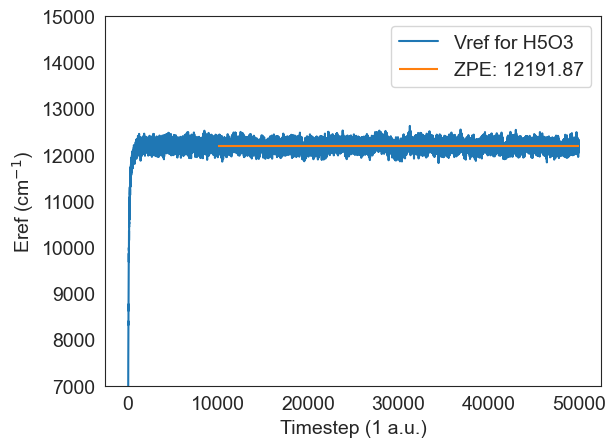

In [21]:
plot_sim_data(
    molecule="H5O3",
    data=None,
    start=10000,
    stop=50000,
    vref_data=vref,
    ylim=(7000, 15000),
    kind="line"
)


In [22]:
snapshots = np.arange(10000,50000,1000) #pull data every 1000 time steps from 10,000 to 50,000

sim_data = pv.SimInfo(f'{path_to_data}/H5O3_0_sim_info.hdf5') #name of the simulation summary file
coords, weights = sim_data.get_wfns(snapshots) #load in the molecule geometries (coords) and their associated weights
coords = pv.Constants.convert(coords,'angstroms',to_AU=False) # conversion of coordinates from atomic units to Angstroms (more common in chemistry)

analyzer = pv.AnalyzeWfn(coords)

hydroxide_distance = analyzer.bond_length(0,1) #calculates the distance between the first two atoms in the coordinates array, which correspond to the hydroxide ion

exp_val = analyzer.exp_val(hydroxide_distance,weights) #calculates the expectation value (average) of the quantity

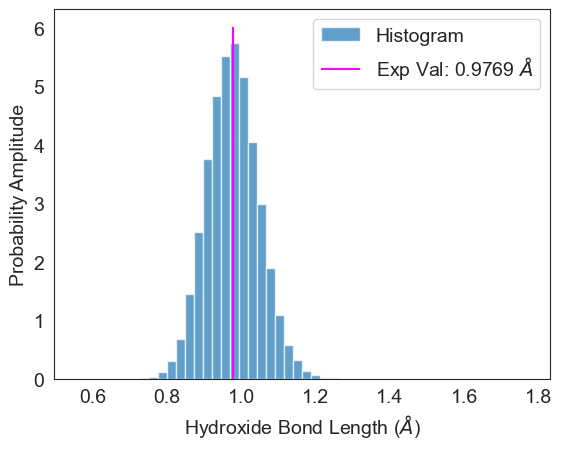

In [24]:
plot_sim_data(
    molecule="H5O3",
    data=None,
    hydroxide_distance=hydroxide_distance,
    weights=weights,
    bins=50,
    density=True,
    kind="histogram"
)


In [25]:
plot_sim_data(
    molecule="H5O3",
    data=None,
    hydroxide_distance=hydroxide_distance,
    weights=weights,
    kind="kde"
)


ValueError: The following variable cannot be assigned with wide-form data: `weights`